## Is it correct to fit a simple SIR to our model's equations?

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlrd
from scipy import stats
import matplotlib.cm as cm
import matplotlib.colors as mcolors

Simple SIR model:

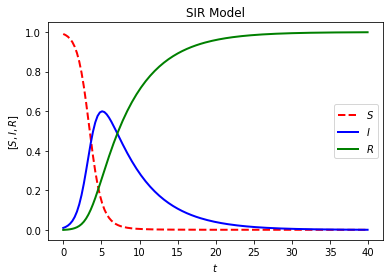

In [6]:
#Initial conditions and t range
t = np.arange(0,40, 0.3)
k0=[1 - 0.01, 0.01, 0] #normalized population

#Differential equation
eta = 1.5
gamma = 0.2
def f(k,t):
    S = k[0]
    I = k[1]
    R = k[2]
    dSdt = -1*eta*I*S
    dIdt = eta*I*S - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]


#Solve
k_s = odeint(f,k0,t)

#Plotting
plt.plot(t,k_s[:,0],'r--', linewidth=2.0)
plt.plot(t,k_s[:,1],'b-', linewidth=2.0)
plt.plot(t,k_s[:,2],'g-', linewidth=2.0)

#print(k[20, 0])
plt.title("SIR Model")    #'$\u03B2 =$ {}, $\gamma =$ {}'.format(eta, gamma))
plt.xlabel("$t$")
plt.ylabel("$[S, I, R]$")
plt.legend(["$S$","$I$", "$R$"])

# plt.savefig('sir.png', dpi = 1200)

Divied population with varios $\beta$ differentiation:

In [7]:
gamma = 1/14
delta = 1
betam = 7/14

def equations(k,t):
    betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

    ST, IT, RT = k[0], k[1], k[2]
    SM, IM, RM = k[3], k[4], k[5]
    SL, IL, RL = k[6], k[7], k[8]
    I = IT + IM + IL
    S = ST + SM + SL
    #top
    dSTdt = -1*betat*I*ST
    dITdt = betat*I*ST - gamma*IT
    dRTdt = gamma*IT
    #medium
    dSMdt = -1*betam*I*SM
    dIMdt = betam*I*SM - gamma*IM
    dRMdt = gamma*IM
    #low
    dSLdt = -1*betal*I*SL
    dILdt = betal*I*SL - gamma*IL
    dRLdt = gamma*IL
    
    return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]

In [8]:
#Initial conditions and t range
t  =  np.arange(0,55, 0.001)

k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]

#Solve
k = odeint(equations,k0,t)

In [74]:
def find_range(cases):
    begin = 0 
    end = np.size(cases)-1
    for i in range(1, end):
        if cases[i] != 0 and begin == 0:
            begin = i
        if begin != 0:
            if i <= 3: shift = 1
            else: shift = i - 3

            if cases[i] < np.average(cases[shift:i]):
                end = i
                break
    end = int(end - end/2)
    return begin, end

In [75]:
find_range(k[:, 1])

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1, 9267)

In [76]:
np.size(k[:, 1])

55000

In [77]:
def fit_equation(cases): 
    begin, end = find_range(cases)
    betaSgamma = np.polyfit(t[begin:end], np.log(list(cases[begin:end])), 1)[0]
    return betaSgamma

In [78]:
begin, end = find_range(k[:, 1])
np.polyfit(t[begin:end], np.log(list(k[begin:end, 1])), 1)[0]

0.2089694111351686

In [79]:
fit_equation(k[:, 1])

0.2089694111351686

In [80]:
def find_beta(cases):
    population = 1
    return (fit_equation(cases) + gamma)/population

In [81]:
find_beta(k[:, 1])

0.28039798256374004

In [82]:
eta = find_beta(k[:, 1])
gamma = 1/14
k0 = [1-0.01, 0.01, 0]
k_s = odeint(f,k0,t)

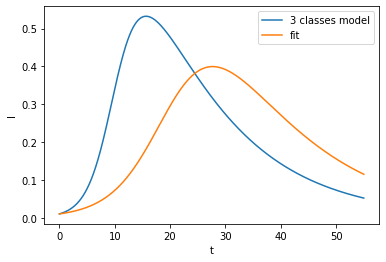

In [85]:
plt.plot(t, k[:, 1]+k[:, 4]+k[:, 7], label = '3 classes model')
plt.plot(t, k_s[:, 1], label = 'fit')

plt.xlabel('t')
plt.ylabel('I')
plt.legend()